In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from fastdtw import fastdtw
import numpy as np
import random
import sys
import sklearn.preprocessing

In [0]:
#load data
df = pd.read_csv("combined.csv")
df_stock_data = df[['TSLA','Apple','GM','Toyata','Google']].copy()


In [0]:
#normalize data
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
data_tesla =min_max_scaler.fit_transform(df["TSLA"].values.reshape(-1,1))
data_apple = min_max_scaler.fit_transform(df["Apple"].values.reshape(-1,1))
data_GM = min_max_scaler.fit_transform(df["GM"].values.reshape(-1,1))
data_toyata = min_max_scaler.fit_transform(df["Toyata"].values.reshape(-1,1))
data_google = min_max_scaler.fit_transform(df["Google"].values.reshape(-1,1))

In [0]:
Company_list = ['Tesla','Apple','General Motors','Toyata','Google']

In [0]:
TSLANetChange = df_stock_data["TSLA"].values.tolist()
AppleNetChange = df_stock_data["Apple"].values.tolist()
GMNetChange = df_stock_data["GM"].values.tolist()
ToyataNetChange = df_stock_data['Toyata'].values.tolist()
GoogleNetChange = df_stock_data['Google'].values.tolist()
timeline = range(len(TSLANetChange))

In [0]:
flat = [i for i in range(300)]

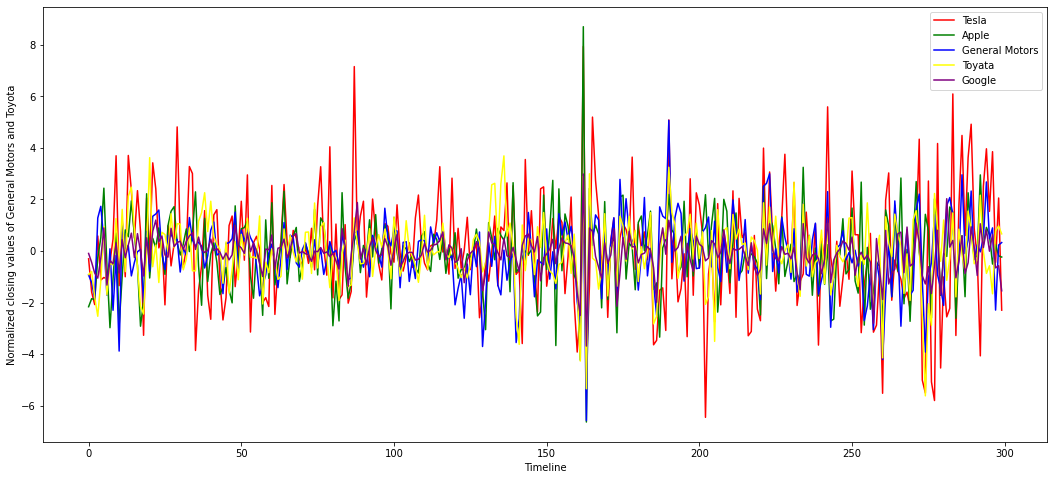

In [0]:
#plot graphs between the stocks of various companies
plt.figure(figsize=(18,8))
plt.plot(timeline,TSLANetChange,color='red',label=Company_list[0])
plt.plot(timeline,AppleNetChange,color='green',label=Company_list[1])
plt.plot(timeline,GMNetChange,color='blue',label=Company_list[2])
plt.plot(timeline,GoogleNetChange,color='yellow',label=Company_list[3])
plt.xlabel("Timeline")
plt.ylabel("Normalized closing values of General Motors and Toyota")
plt.plot(timeline,ToyataNetChange,color='purple',label=Company_list[4])
plt.legend()

In [0]:
tsla_pack=[]
apple_pack = []
GM_pack =[]
microsoft_pack=[]
toyata_pack = []
flat_pack =[]
google_pack = []
for i in range(0,len(ToyataNetChange)):
    tsla_pack.append([i,data_tesla[i]])
    apple_pack.append([i,data_apple[i]])
    GM_pack.append([i,data_GM[i]])
#     microsoft_pack.append([i,MicrosoftNetChange[i]])
    toyata_pack.append([i,data_toyata[i]])
    google_pack.append([i,data_google[i]])
    flat_pack.append([i,random.randrange(-10,10)])
    
    

In [0]:
tsla_pack = np.array(tsla_pack)
apple_pack = np.array(apple_pack)
GM_pack = np.array(GM_pack)
toyata_pack = np.array(toyata_pack)
google_pack = np.array(google_pack)
flat_pack = np.array(flat_pack)

In [0]:
complete_pack=[]
complete_pack.append(tsla_pack)
complete_pack.append(apple_pack)
complete_pack.append(GM_pack)
# complete_pack.append(microsoft_pack)
complete_pack.append(toyata_pack)
complete_pack.append(google_pack)

In [0]:
min_dist = sys.maxsize
stocks_with_max_rel = []
print(len(complete_pack))
min_dist

5


9223372036854775807

In [0]:
#calculate dtw distance between the stock histories of each pair of companies. create distance matrix
for i in range(0,len(complete_pack)):
    for j in range(i+1,len(complete_pack)):
        distance,path = fastdtw(complete_pack[i],complete_pack[j])
        print(Company_list[i],Company_list[j],distance)
        if(distance<min_dist):
            min_dist = distance
            stocks_with_max_rel = [i,j]
            distance1, path1 = fastdtw(complete_pack[i], flat_pack)
            distance2,path2 = fastdtw(complete_pack[j],flat_pack)

Tesla Apple 35.05590370577474
Tesla General Motors 43.34977136538224
Tesla Toyata 39.884016477382154
Tesla Google 54.23040448152624
Apple General Motors 43.330220796230556
Apple Toyata 38.266072957126184
Apple Google 55.94400328775077
General Motors Toyata 22.165190520755957
General Motors Google 33.325168968290185
Toyata Google 31.146573951089948


In [0]:
#minimum distance found
min_dist

22.165190520755957

In [0]:
#percentage of correlative match
print(((distance1-min_dist)/distance1)*100,"%")

98.56494627882478 %


In [0]:
stocks_with_max_rel

[2, 3]

In [0]:
#stocks that match
print(Company_list[stocks_with_max_rel[0]] + " and "+ Company_list[stocks_with_max_rel[1]]+" are the two most realted stocks from the company list")

Genereal Motors and Toyata are the two most realted stocks from the company list
